In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2

from skimage import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers.legacy import Adam
import os
import cv2
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import networkx as nx
import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display

In [2]:
brain_scans = []
mask_files = glob.glob('/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/*/*_mask*')

for i in mask_files:
    brain_scans.append(i.replace('_mask',''))

In [3]:
brain_scans

['/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_8.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_9.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_2.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_3.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_20.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_15.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_14.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_18.tif',
 '/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_19.ti

In [28]:
target_shape = (256, 256)
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_shape)

In [29]:
def positive_negative_diagnosis(file_masks):
    mask = cv2.imread(file_masks)
    value = np.max(mask)
    if value > 0:
        return 1
    else:
        return 0

In [30]:
#!pip install kaggle
#!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

In [31]:
#import shutil
#shutil.unpack_archive("/content/lgg-mri-segmentation.zip", "/content/sample_data")

In [32]:
def graph_cut_segmentation(image, binary_mask):
    # Create a graph
    graph = nx.Graph()

    # Add nodes to the graph
    h, w = binary_mask.shape
    for i in range(h):
        for j in range(w):
            node_id = i * w + j
#            graph.add_node(node_id)
#
#    # Add edges to the graph based on image gradients or other criteria
#    # ...
#
#    # Set the source and sink nodes
#    source_node = -1
#    sink_node = -2
#    graph.add_node(source_node)
#    graph.add_node(sink_node)
#
#    # Add edges from the source node to the foreground (tumor) region
#    foreground_indices = np.where(binary_mask > 0)
#    for i, j in zip(foreground_indices[0], foreground_indices[1]):
#        node_id = i * w + j
#        graph.add_edge(source_node, node_id, capacity=float('inf'))
#
#    # Add edges from the background region to the sink node
#    background_indices = np.where(binary_mask == 0)
#    for i, j in zip(background_indices[0], background_indices[1]):
#        node_id = i * w + j
#        graph.add_edge(node_id, sink_node, capacity=float('inf'))
#
#    # Perform the graph cut
#    cut_value, partition = nx.minimum_cut(graph, source_node, sink_node)
#
#    # Get the nodes in the foreground (tumor) region
#    tumor_nodes = partition[0].difference({source_node, sink_node})
#
#    # Create a mask for the tumor region
#    tumor_mask = np.zeros_like(binary_mask)
#    for node_id in tumor_nodes:
#        i, j = divmod(node_id, w)
#        tumor_mask[i, j] = 255
#
#    # Apply the tumor mask to the original brain image
#    tumor_image = cv2.bitwise_and(brain_image, brain_image, mask=tumor_mask)
#    return tumor_image
#
#


In [33]:
#i=0
#mask_files = glob.glob('/content/sample_data/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
#if not mask_files:
#    print("No mask files found in the directory.")
#else:a
#    print("Found mask files:")
#    for file in mask_files:
#        print(file)
#
#    brain_scans = [file.replace('_mask', '') for file in mask_files]
#    #print("Corresponding brain scan images:")
#    #print(len(brain_scans))
#    #for scan in brain_scans:
#        #print(scan)
#
#    # Iterate over brain scan images
#    for image_path, mask_path in zip(brain_scans, mask_files):
#        folder_name = os.path.dirname(image_path)
#        #print(f"Processing folder: {folder_name}")
#
#        # Load the brain image
#        brain_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#
#        # Preprocess the image by converting it to grayscale
#        gray_image = cv2.cvtColor(brain_image, cv2.COLOR_BGR2GRAY)
#
#        # Load the mask
#        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
#
#        # Preprocess the mask by thresholding it to obtain a binary image
#        _, binary_mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
#
#        # Perform graph cut segmentation
#        tumor_image = graph_cut_segmentation(brain_image, binary_mask)
#
#        # Save the tumor image
#        tumor_folder = os.path.join(folder_name, "tumor_images")
#        os.makedirs(tumor_folder, exist_ok=True)
#        tumor_image_path = os.path.join(tumor_folder, f"{os.path.basename(image_path)}_tumor.tif")
#        cv2.imwrite(tumor_image_path, tumor_image)
#
#        #print(f"Tumor image saved: {tumor_image_path}")
#        #print()  # Add a new line for better readability
#        i+=1
#        #print("number of process pictures: ",i)
#        print("amount of progress: ",i/len(brain_scans))
#

In [34]:
tumor = glob.glob('/Users/neginnoori/comp508/lgg-mri-segmentation/kaggle_3m/*/tumor_images/*_tumor*')

In [35]:
tumor_GC = pd.DataFrame({
    "image_path":brain_scans[0:100],
    "tumor_path":tumor[0:100]
})

tumor_GC["Tumor"] = tumor_GC["tumor_path"].apply(lambda x: positive_negative_diagnosis(x))


(256, 256, 3)
(256, 256, 3)


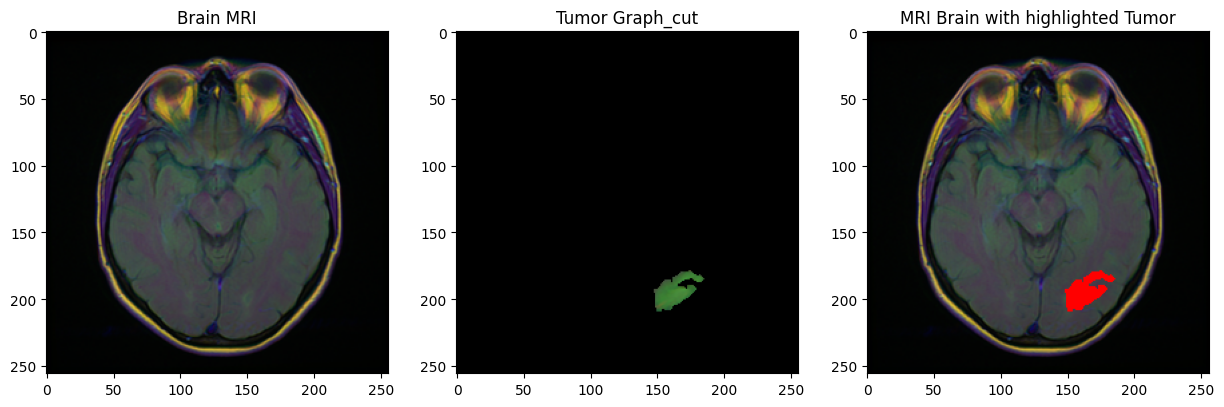

(256, 256, 3)
(256, 256, 3)


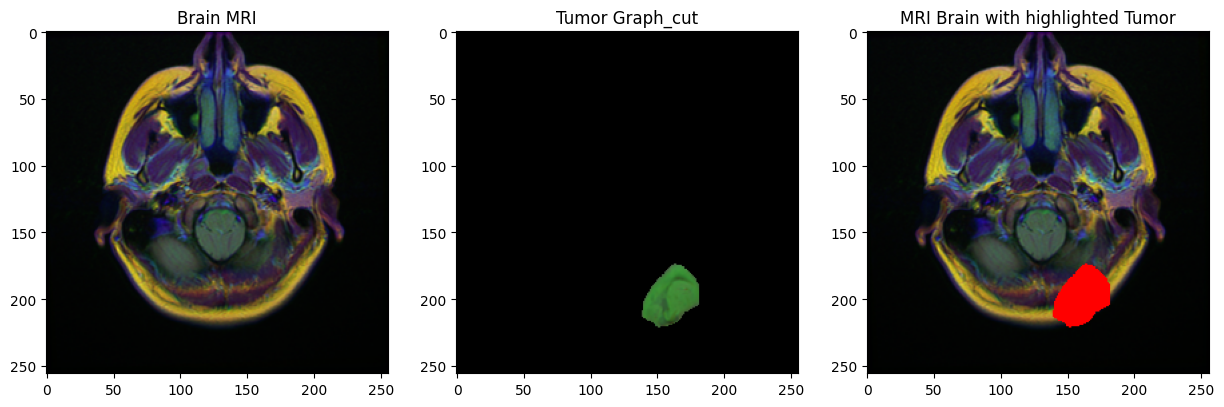

(256, 256, 3)
(256, 256, 3)


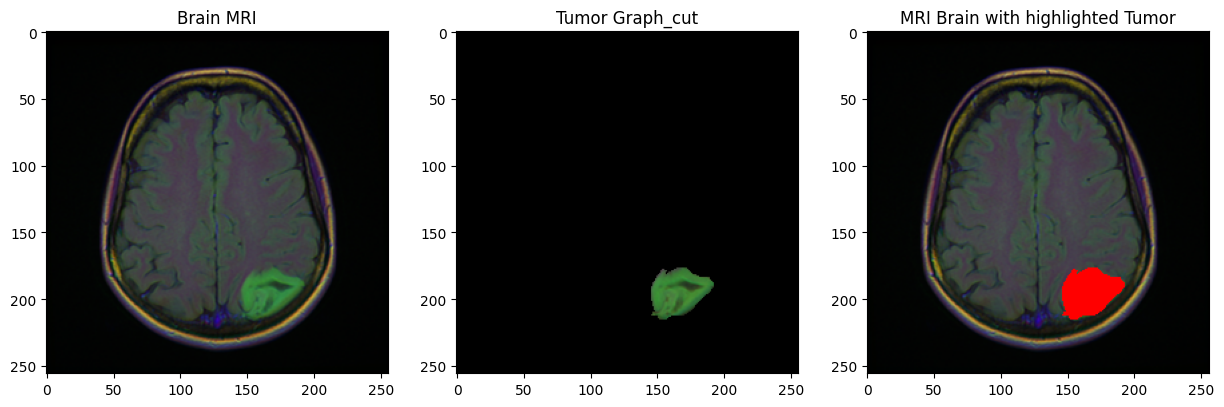

(256, 256, 3)
(256, 256, 3)


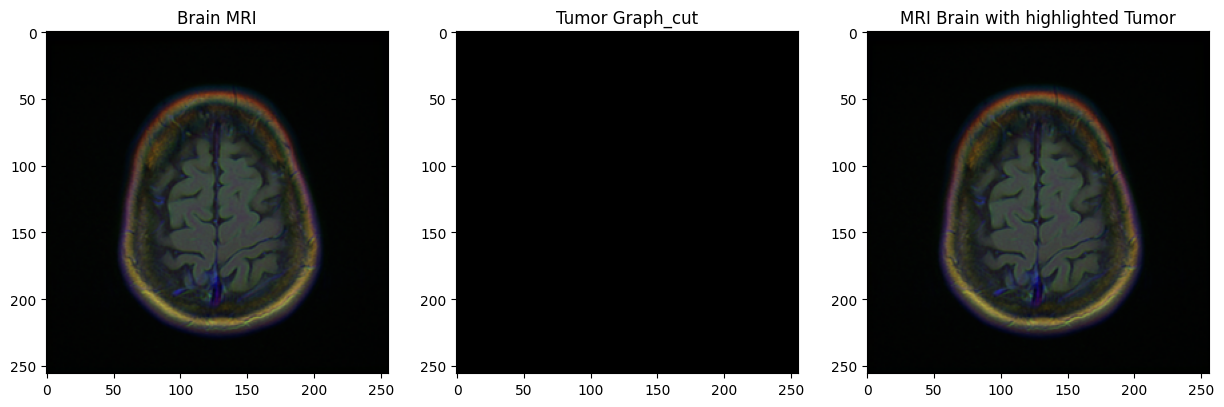

(256, 256, 3)
(256, 256, 3)


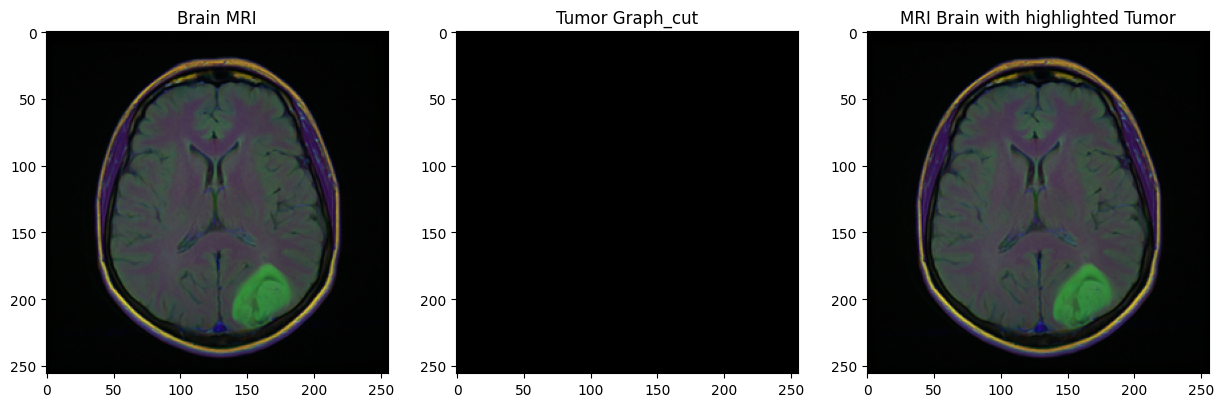

(256, 256, 3)
(256, 256, 3)


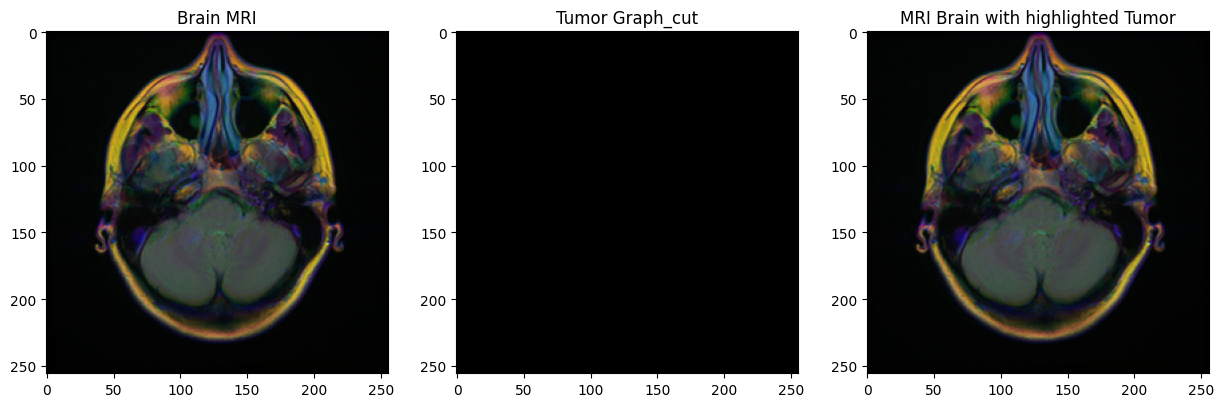

(256, 256, 3)
(256, 256, 3)


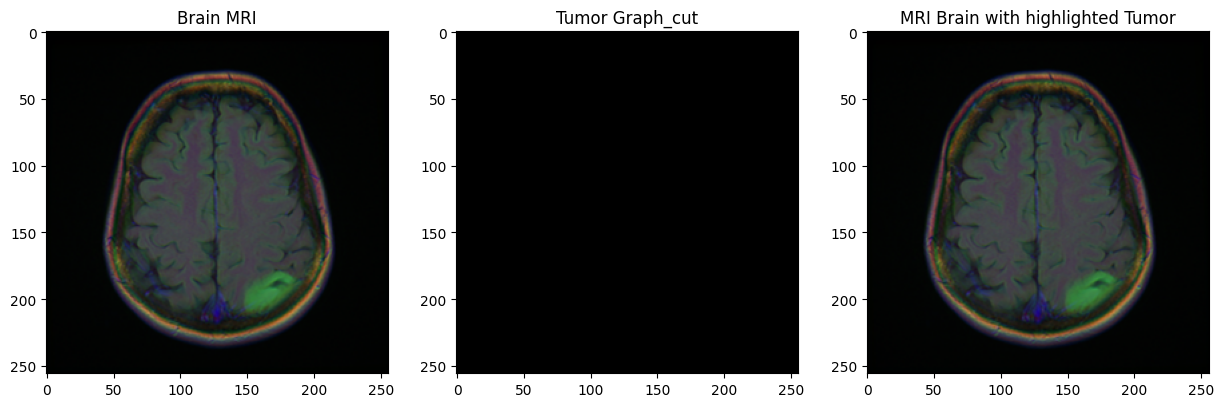

(256, 256, 3)
(256, 256, 3)


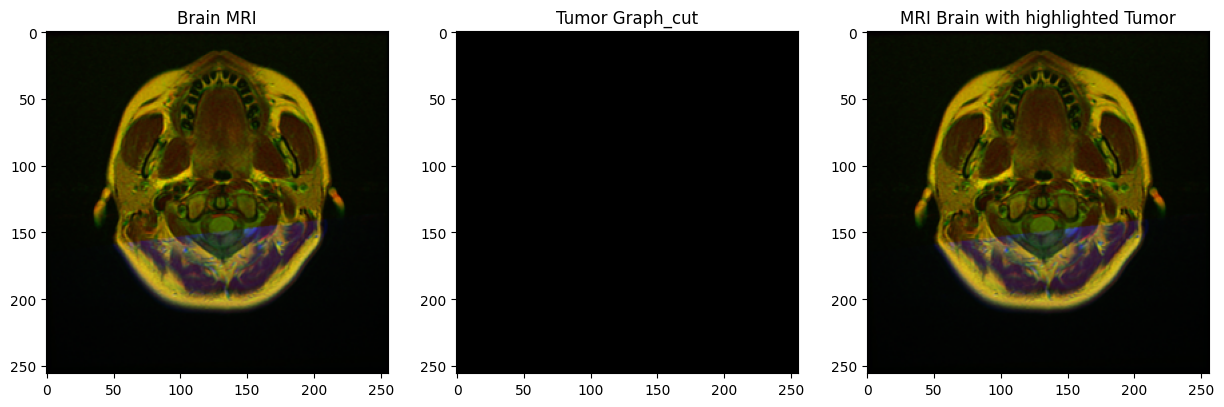

(256, 256, 3)
(256, 256, 3)


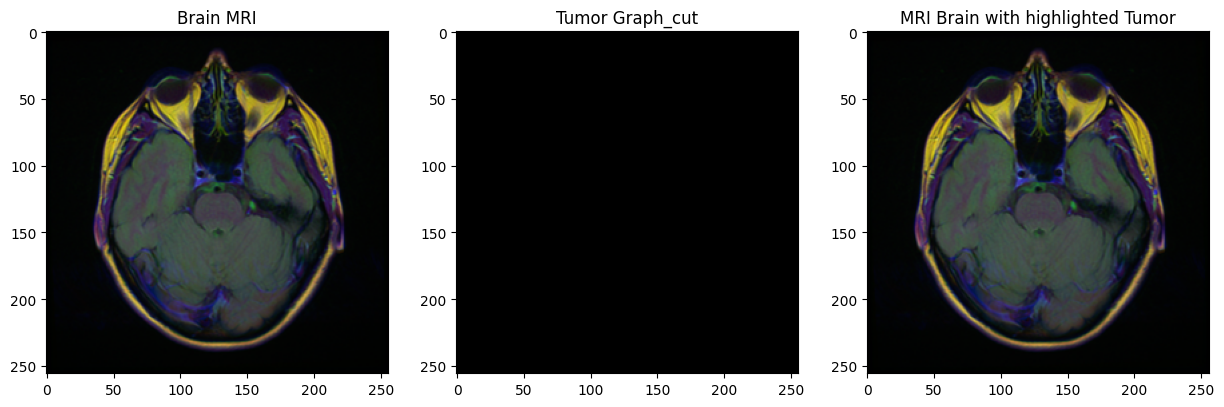

(256, 256, 3)
(256, 256, 3)


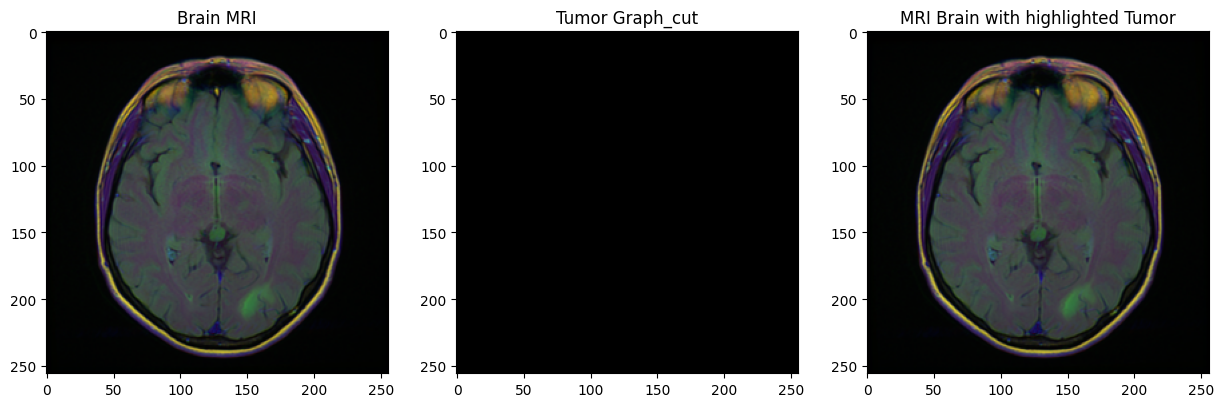

(256, 256, 3)
(256, 256, 3)


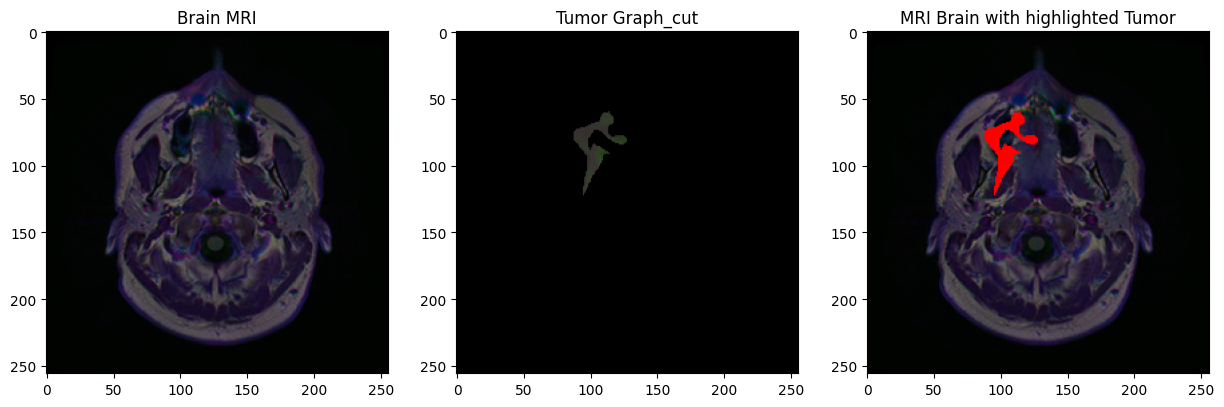

(256, 256, 3)
(256, 256, 3)


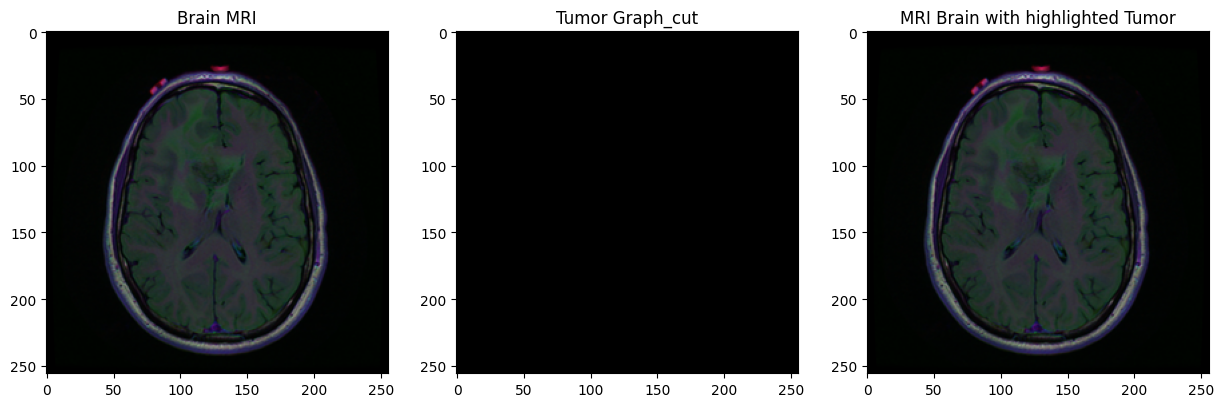

(256, 256, 3)
(256, 256, 3)


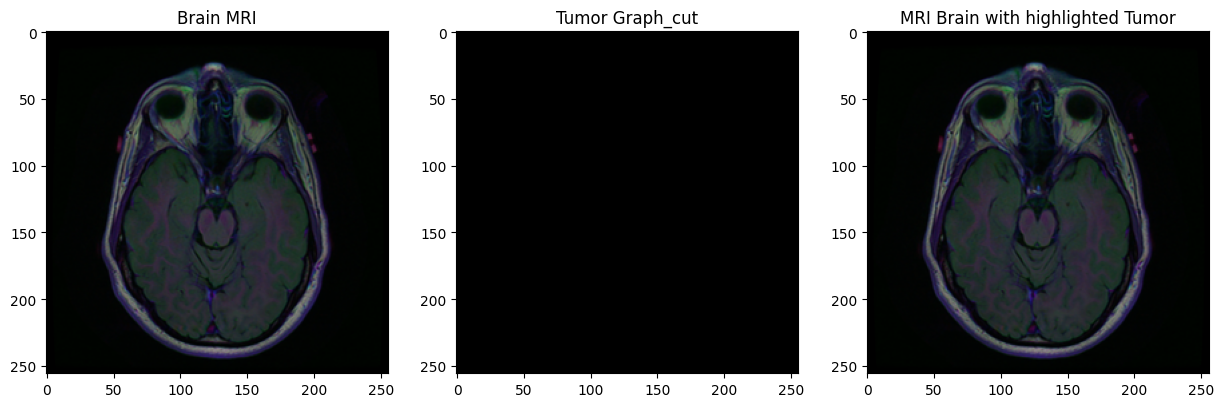

(256, 256, 3)
(256, 256, 3)


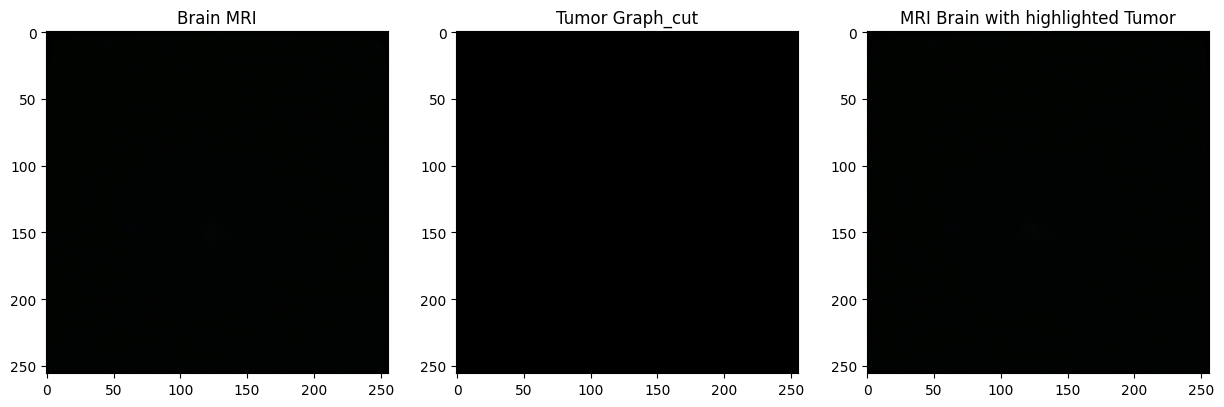

(256, 256, 3)
(256, 256, 3)


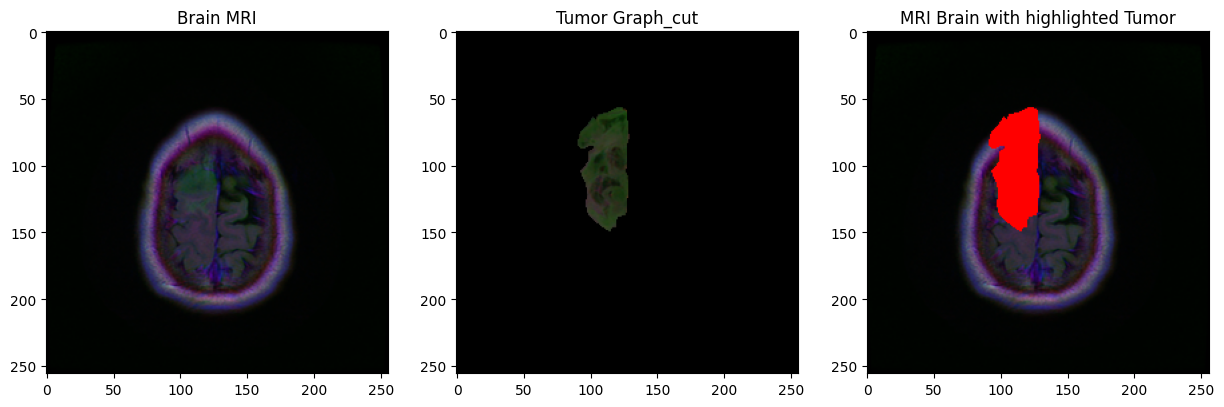

(256, 256, 3)
(256, 256, 3)


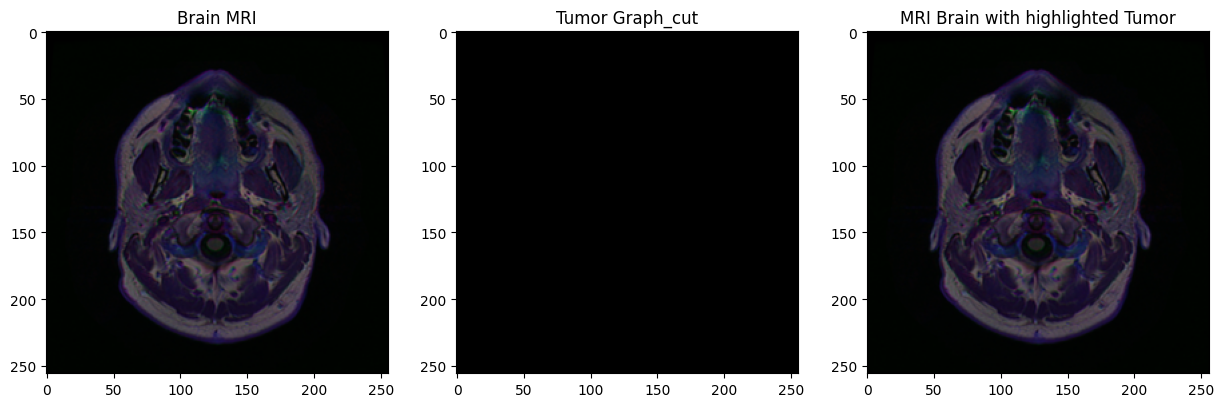

(256, 256, 3)
(256, 256, 3)


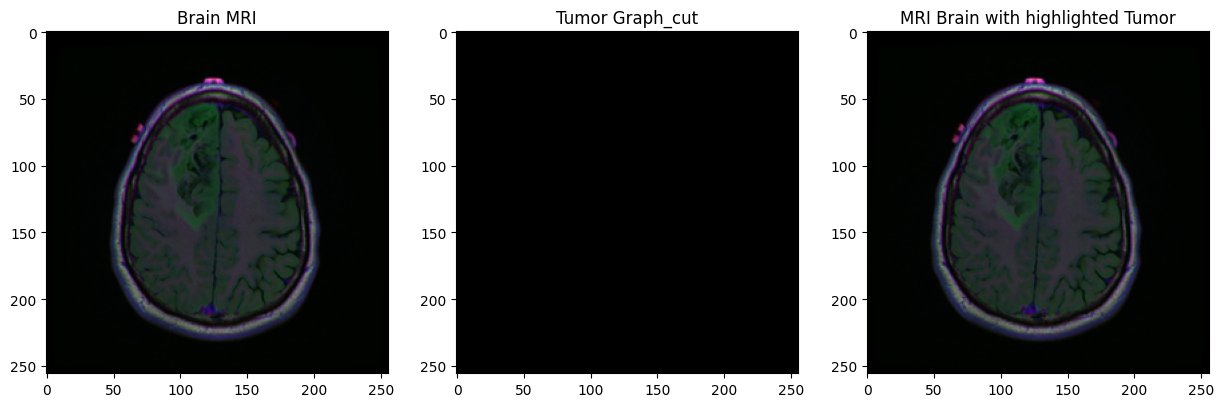

(256, 256, 3)
(256, 256, 3)


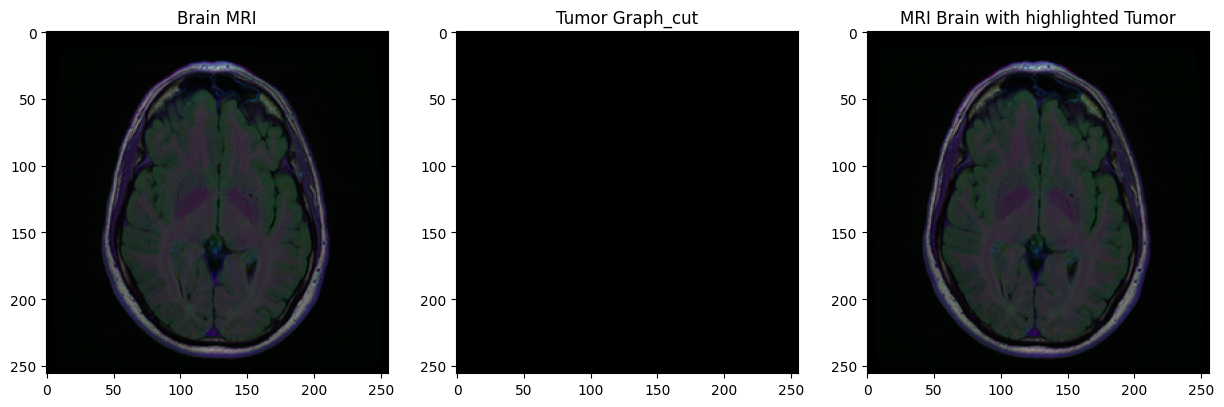

(256, 256, 3)
(256, 256, 3)


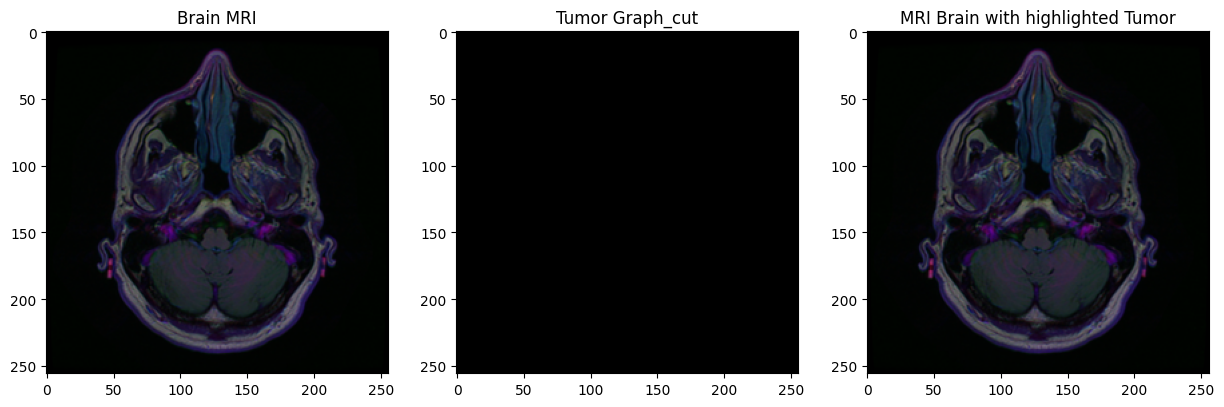

(256, 256, 3)
(256, 256, 3)


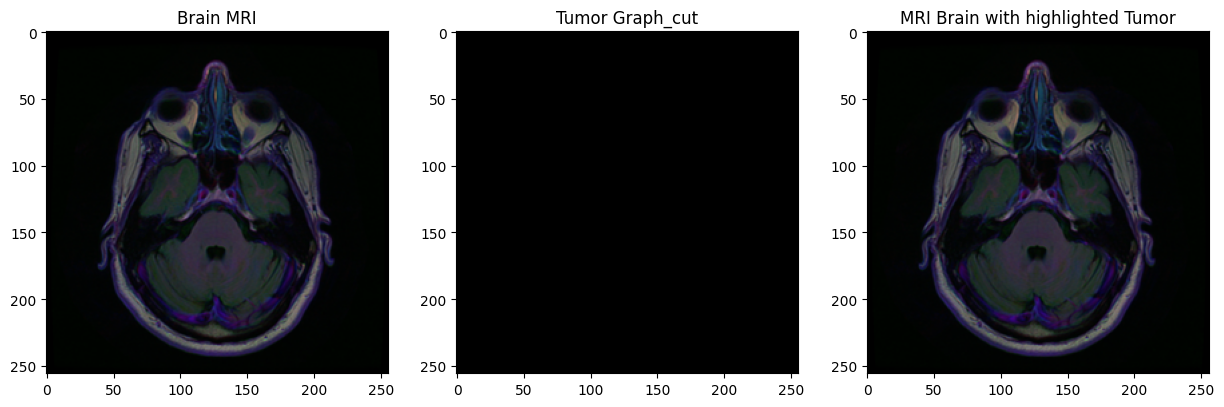

In [36]:
for i in range(1, 40, 2):
    img_path = brain_scans[i]
    msk_path = tumor[i]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    msk = cv2.imread(msk_path)

    original = img.copy()
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original)
    ax[0].set_title("Brain MRI")

    main = original.copy()
    mask = msk.copy()
    print(mask.shape)
    ax[1].imshow(mask)
    ax[1].set_title("Tumor Graph_cut")

    main = original.copy()
    label = cv2.imread(msk_path)
    sample = np.array(np.squeeze(label), dtype=np.uint8)
    contours, hier = cv2.findContours(sample[:, :, 0], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    sample_over_gt = cv2.drawContours(main, contours, -1, [255, 0, 0], thickness=-1)
    print(label.shape)
    ax[2].imshow(sample_over_gt)
    ax[2].set_title("MRI Brain with highlighted Tumor")


    #preprocessed_image = preprocess_image(img_path)
    #preprocessed_image_path = os.path.join('/path/to/preprocessed', os.path.basename(img_path))
    #cv2.imwrite(preprocessed_image_path, preprocessed_image)

    plt.show()

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tumor_GC, test_size=0.1)
train, val = train_test_split(train, test_size=0.2)

print(train.values.shape)
print(val.values.shape)
print(test.values.shape)

(72, 3)
(18, 3)
(10, 3)


In [38]:
def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1):
    '''
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_path",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "tumor_path",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [39]:
EPOCHS = 100
BATCH_SIZE = 8
im_height = 256
im_width = 256


In [40]:
train_generator_args = dict(width_shift_range=0.05,
                            height_shift_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'
                           )


train_gen = train_generator(train, BATCH_SIZE,
                            train_generator_args,
                            target_size=(im_height,
                            im_width)
                           )


test_gen = train_generator(val, BATCH_SIZE,
                            dict(),
                            target_size=(im_height, im_width)
                            )

In [41]:
smooth=100

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)

    return - iou(y_true, y_pred)

In [42]:
DNA_parameter = [[4,8,12,16,20],
                 [16,32,64,128,256,512,1024],
                 ["relu","sigmoid","selu","swish","linear"], #"leakyrelu",
                 ["adam","adamax","nadam"],
                 [dice_coef_loss],
                 [(3, 3), (5, 5), (7, 7)]
                ]
Feature_vector_size = 256, 256, 3
num_classes = 1

In [43]:
results = []
perf_results = []
perf_results_check = []

def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)
lr_scheduler =  tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=30)


In [44]:
class Network:
    def __init__(self,input_shape,out_put_shape,DNA_param,epochs):
        """

        Args:
          input_shape:
          out_put_shape:
          DNA_param:
          epochs:
        """

        self.architecture_DNA = [] # to save current parameters
        self.fitness = []
        self.acc_history = []
        self.input_shape = input_shape
        self.out_shape = out_put_shape
        self.epochs = epochs


        # unfold DNA_parameters:
        depth = DNA_param[0]
        neurons_per_layer = DNA_param[1]
        activations = DNA_param[2]
        optimizer = DNA_param[3]
        losses = DNA_param[4]
        kernel_size = DNA_param[-1]

        model = Sequential()
        # Building the init network with random choices:
        network_depth = np.random.choice(depth)
        self.architecture_DNA.append(network_depth)

        for i in range(network_depth):
            if i == 0:
                neurons = np.random.choice(neurons_per_layer)
                kernel = kernel_size[np.random.choice(3)]
                print("kernel is :", kernel)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons, kernel, activation])
                model.add(Conv2D(filters = neurons, kernel_size=kernel ,input_shape = (self.input_shape), activation  = activation, padding = "same",strides=1))
                model.add(BatchNormalization(axis=3))
            if i == network_depth - 1:
                activation  = np.random.choice(activations)
                self.architecture_DNA.append(activation)
                model.add(Conv2D(filters = self.out_shape, kernel_size = (1, 1), activation = activation,padding = "same",strides=1))
            else:
              neurons = np.random.choice(neurons_per_layer)
              activation  = np.random.choice(activations)
              kernel = kernel_size[np.random.choice(3)]
              print("kernel is :", kernel)
              self.architecture_DNA.append([neurons, kernel, activation])
              model.add(Conv2D(filters = neurons, kernel_size=kernel ,input_shape = (self.input_shape), activation  = activation,padding = "same",strides=1))
              model.add(BatchNormalization(axis=3))

        loss=np.random.choice(losses)
        optimizer=np.random.choice(optimizer)
        self.architecture_DNA.append([loss,optimizer])
        model.compile(loss=loss, optimizer= optimizer, metrics=["binary_accuracy", iou, dice_coef])
        self.model = model
        print("Model activation function is: ", activation)
        print("Number of nurons is: ", neurons)
        print("Network depth is: ", network_depth)
        print("Optimizer is: ", optimizer )

        ### STRUCTURE OF ACHITECTURE DNA ###
        # architecture_DNA[0] = Depth
        # architecture_DNA[1] = Input_layer with: [0] = neurons, [1] = activation
        # architecture_DNA[2 to Depth-1*] = Hidden layer with: [0] = neurons, [1] = activation
        # architecture_DNA[Depth] = Output layer activation
        # architecture_DNA[-1] = Hyperparameter with: [0] = loss, [1] = optimizer

        # *Depth-1 last hidden layer since last layer is output layer
        ####################################

    def create_children(self, children_DNA):
        model = Sequential()
        ####################################################################################
        # unfold children DNA:                                                             #
        # children_DNA[0] = Depth                                                          #
        # children_DNA[1] = Input_layer with: [0] = neurons, [1] = activation              #
        # children_DNA[2 to Depth-1*] = Hidden layer with: [0] = neurons, [1] = activation #
        # children_DNA[Depth] = Output layer activation                                    #
        # children_DNA[-1] = Hyperparameter with: [0] = loss, [1] = optimizer              #
        ####################################################################################

        #print("DNA_length: ", len(children_DNA))
        children_depth = children_DNA[0]
        #print("Depth: ", children_depth)
        #print(children_DNA)
        for i in range(children_depth):
            if i == 0:
                #Input Layer
                #model.add(Dense(children_DNA[1][0],input_shape = (self.input_shape,), activation = children_DNA[1][1]))
                model.add(Conv2D(filters = children_DNA[1][0], kernel_size = (3, 3),input_shape = (self.input_shape,), activation = children_DNA[1][1],padding = "same",strides=1))
            if i == children_depth -1:
                #model.add(Dense(self.classes, activation = children_DNA[children_depth]))
                model.add(Conv2D(self.out_shape, (1, 1), activation = children_DNA[children_depth],padding = "same",strides=1))
            else:
                #print(children_DNA[i+1])
                if i != children_depth -1:
                    #model.add(Dense(children_DNA[i+1][0], activation = children_DNA[i+1][1]))
                    model.add(Conv2D(filters = children_DNA[i+1][0], kernel_size = (3, 3), activation = children_DNA[i+1][1],padding = "same",strides=1))

        model.compile(loss = children_DNA[-1][0], optimizer = children_DNA[-1][1], metrics=["binary_accuracy", iou, dice_coef])
        self.model = model
        self.architecture_DNA = children_DNA


    def give_fitness(self):
        return self.fitness


    def train(self):
        #start = time.time()
        checkpoint_cb = keras.callbacks.ModelCheckpoint(f"Model_Saved_Weight.h5",save_best_only=True)
        self.model.summary()
        self.model.fit(train_gen, batch_size = BATCH_SIZE,epochs = self.epochs, validation_data=test_gen ,verbose = 1,shuffle = True,callbacks=[checkpoint_cb,lr_scheduler]) #, validation_data =(X_test, y_test)
        #end = time.time()
        #self.fitness[0] = end-start


    def test(self):
        print("evaloution procces strated")

        loss, acc = self.model.evaluate(test_gen)
        perf_results_check.append((loss, acc))
        print("achive accuracy is ", acc)
        print("achive accuracy is ", loss)
        self.acc_history.append(acc)


    def give_DNA(self):
        return self.architecture_DNA

    def architecture(self):
        self.model.summary()
        

In [45]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, generations = 50, Epochs = 100):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.training_epochs = Epochs
        self.population = None
        self.children_population_DNA = []
        self.acces = []
        self.norm_acces = []

    def create_population(self):
        self.population = [Network(Feature_vector_size, num_classes, DNA_parameter,self.training_epochs) for i in range(self.population_size)]

    def train_generation(self):
        for member in self.population:
                member.train()

    def predict(self):
        for member in self.population:
                member.test()
                self.acc.append(member.give_fitness())

    def normalize(self):
        print("The calculated values for invers of loss is ",self.acc)
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc]
        #print("\nNormalization sum: ",sum(self.norm_acc))
        #assert sum(self.norm_acc) == 1

    def clear_losses(self):
        self.norm_acc = []
        self.acc = []

    def mutate(self):
        for child_DNA in self.children_population_DNA:
            for i in range(len(child_DNA)):
                if np.random.random() < self.mutation_rate:
                    print("\nMutation!")
                    if i == 0:
                        new_depth = np.random.choice(DNA_parameter[0])
                        child_DNA[0] = new_depth

                    if i == len(child_DNA)-2:
                        new_output_activation = np.random.choice(DNA_parameter[2])
                        child_DNA[-2] = new_output_activation

                    if i == len(child_DNA)-1:
                        # random flip if loss or activation shall be changed
                        if np.random.random() < 0.5:
                            new_loss = np.random.choice(DNA_parameter[4])
                            child_DNA[-1][0] = new_loss
                        else:
                            new_optimizer = np.random.choice(DNA_parameter[3])
                            child_DNA[-1][1] = new_optimizer
                    if i != 0 and i !=len(child_DNA)-2 and i != len(child_DNA)-1:
                    #else:
                        # 3/2 flif if number of neurons or activation function mutates:
                        #print(child_DNA)
                        if np.random.random() < 0.33:
                            #print(child_DNA[i][1])
                            new_activation = np.random.choice(DNA_parameter[2])
                            #print(new_activation)
                            child_DNA[i][1] = new_activation
                        else:
                            #print(child_DNA[i][0])
                            new_neuron_count = np.random.choice(DNA_parameter[1])
                            child_DNA[i][0] = new_neuron_count
                            #print(new_neuron_count)
                    #print("After mutation ", child_DNA)

    def reproduction(self):
        """
        Reproduction through midpoint crossover method
        """
        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):
        #selects two parents probabilistic accroding to the fitness score
            if sum(self.norm_acc) != 0:
                parent1 = np.random.choice(population_idx, p = self.norm_acc)
                parent2 = np.random.choice(population_idx, p = self.norm_acc)
            else:
              # if there are no "best" parents choose randomly
                parent1 = np.random.choice(population_idx)
                parent2 = np.random.choice(population_idx)

            # picking random midpoint for crossing over name/DNA
            parent1_DNA = self.population[parent1].give_DNA()
            parent2_DNA = self.population[parent2].give_DNA()
            #print(parent1_DNA)

            mid_point_1 = np.random.choice([i for i in range(2,len(parent1_DNA)-2)])
            mid_point_2 = np.random.choice([i for i in range(2,len(parent2_DNA)-2)])
            # adding DNA-Sequences of the parents to final DNA
            child_DNA = parent1_DNA[:mid_point_1] + parent2_DNA[mid_point_2:]
            new_nn_depth = len(child_DNA)-2 # minus 2 because of depth parameter[0] and loss parameter[-1]
            child_DNA[0] = new_nn_depth
            self.children_population_DNA.append(child_DNA)
        # old population gets the new and proper weights
        self.mutate()
        keras.backend.clear_session() ## delete old models to free memory
        for i in range(len(self.population)):
            self.population[i].create_children(self.children_population_DNA[i])



    def run_evolution(self):
        for episode in range(self.generations):
            print("\n--- Generation {} ---".format(episode))
            self.clear_losses()
            print("Clearing session is done!")
            self.train_generation()
            print("Training session is done!")
            self.predict()
            print("Predicting output is finished!")
            if episode != self.generations -1:
                self.normalize()
                self.reproduction()

            else:
                pass
            self.children_population_DNA = []
        # plotting history:
        for a in range(self.generations):
            for member in self.population:
                print(member.acc_history)
                plt.plot(member.acc_history)
        plt.xlabel("Generations")
        plt.ylabel("inverse of loss ")
        plt.show()
        

In [46]:
n=0
try:
  print(n+1)
  GA = GeneticAlgorithm(population_size = 4,mutation_rate = 0.02, generations = 6,Epochs=100)
  GA.create_population()
  GA.run_evolution()
except TypeError:
  pass



1
kernel is : (7, 7)
kernel is : (7, 7)
kernel is : (5, 5)
kernel is : (7, 7)
Model activation function is:  selu
Number of nurons is:  1024
Network depth is:  4
Optimizer is:  nadam
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (3, 3)
kernel is : (5, 5)
kernel is : (3, 3)
kernel is : (7, 7)
kernel is : (5, 5)
kernel is : (5, 5)
kernel is : (5, 5)
kernel is : (3, 3)
kernel is : (5, 5)
kernel is : (3, 3)
kernel is : (7, 7)
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (7, 7)
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (3, 3)
kernel is : (5, 5)
Model activation function is:  relu
Number of nurons is:  256
Network depth is:  20
Optimizer is:  nadam
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (5, 5)
kernel is : (3, 3)
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (7, 7)
kernel is : (7, 7)
kernel is : (5, 5)
kernel is : (7, 7)
kernel is : (7, 7)
kernel is : (3, 3)
kernel is : (3, 3)
kernel is : (5, 5)
kernel is : (7, 7)
kernel is : (5, 5)
Model activation function is

2024-05-29 16:10:16.106086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    127/Unknown - 2905s 23s/step - loss: -3.0937e-05 - binary_accuracy: 0.7017 - iou: 3.0937e-05 - dice_coef: 3.0937e-05